# Importing the packages

In [759]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import trim_mean, iqr
from sklearn.preprocessing import PolynomialFeatures
import random
from tabulate import tabulate
from scipy.stats import norm

In [731]:
random.seed(1854536)

# Constants
CHOSEN_DEGREE = 14

# Question 1: Exploratory data analysis
#### (a) Construct a histogram and a boxplot of the wavelength, and comment on the plots.

In [732]:
df = pd.read_csv('cbl20.csv')
x = np.array(df['X'])
y = np.array(df['Y'])

df.columns = ['Time', 'Wavelength']

Text(0.5, 1.0, 'Histogram for Wavelength data')

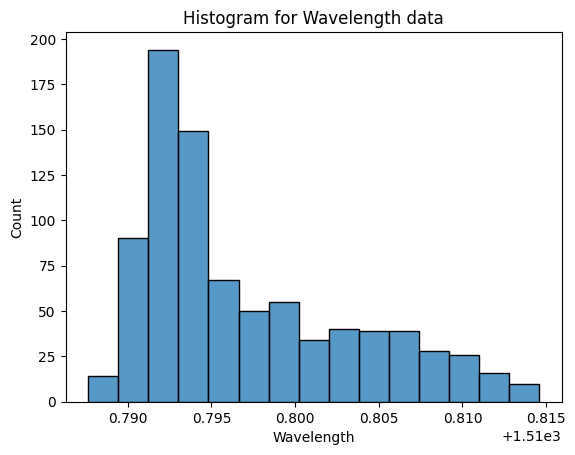

In [733]:
sns.histplot(data=df, x='Wavelength')
plt.title('Histogram for Wavelength data')

<span style="color:aqua">The histogram show that the wavelength data has positive skew.</span>

Text(0.5, 1.0, 'Boxplot for Wavelength data')

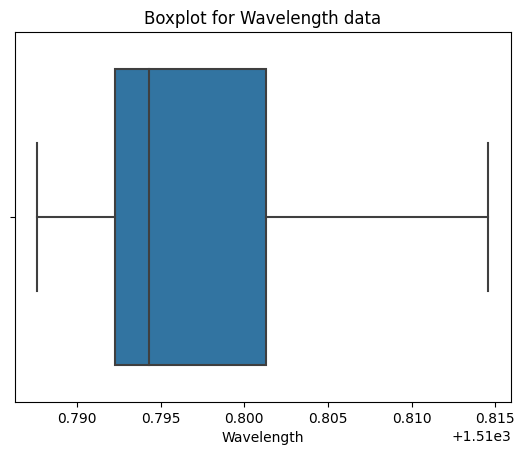

In [734]:
sns.boxplot(data=df, x='Wavelength')
plt.title('Boxplot for Wavelength data')

<span style="color:aqua">The box plot shows that the outliers furthest from the median are above the median.</span>

#### (b) Compute the mean, 10% trimmed mean, median, standard deviation, and interquar-tile range of the wavelength and present these in a table. Which of these measurements would you use to best describe the data? Justify your answer.

In [735]:
mean = np.mean(y)
trimmed_mean = trim_mean(y, proportiontocut=0.1)
median = np.median(y)
std = np.std(y)
IQR = iqr(y)

table = [['Mean', mean],
         ['Trimmed Mean', trimmed_mean],
         ['Median', median],
         ['Standard Deviation', std],
         ['IQR', IQR],]

col_names = ['Statistic', 'Value']

print(tabulate(table, headers=col_names, floatfmt=".6f"))

Statistic                 Value
------------------  -----------
Mean                1510.797057
Trimmed Mean        1510.796291
Median              1510.794313
Standard Deviation     0.006283
IQR                    0.009010


<span style="color:aqua">The median is used to describe the centre of the data as it is not impacted by the outliers. The mean is not used as it is impacted by the outliers and will be higher than the true centre of the data. The IQR is used to describe the dispersion of data as this does not rely on the mean for its calculation.</span>

#### (c) Construct a scatterplot of wavelength versus time index.

Text(0, 0.5, 'Wavelength')

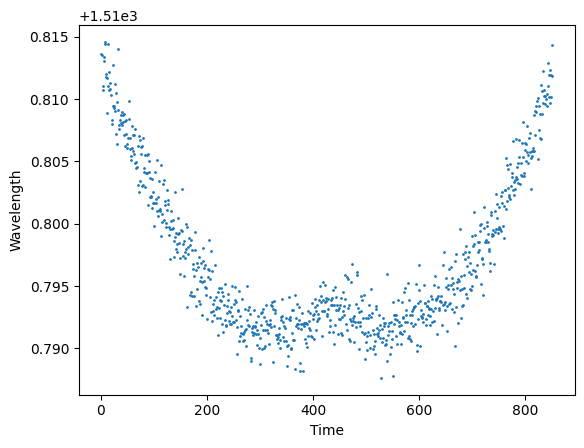

In [736]:
plt.scatter(x, y, s=1)
plt.xlabel('Time')
plt.ylabel('Wavelength')

# plt.title('Scatter plot of Wavelength against Time')

# Question 2. Modelling
#### (a) Fit a simple linear regression model for wavelength versus time index. Plot the linear fit on your scatterplot in question 1(c). Comment on the appropriateness of this model for your data.

In [737]:
def get_normalized_design_matrix(x, degree):
    trans = PolynomialFeatures(degree=degree)
    X = trans.fit_transform(x.reshape(-1, 1))
    X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
    return X

In [738]:
def predict(model_params, x):
    return np.matmul(np.transpose(model_params), x)

In [739]:
def fit_model_and_predict(x, y, degree, AIC_values=None, return_model=False):
    X = get_normalized_design_matrix(x, degree)
    model = sm.OLS(y, X).fit()
    y_predict = [predict(np.array(model.params), X[i]) for i in range(len(y))]
    if AIC_values != None:
        AIC_values.append(model.aic)
    if return_model:
        return y_predict, model
    else:
        return y_predict

In [740]:
def plot_scatter_and_polynomial_best_fit_line(x, y, degree):
    plt.scatter(x, y, s=1)
    y_predict = fit_model_and_predict(x, y, degree)
    plt.plot(x, y_predict, c='orange')
    plt.xlabel('Time')
    plt.ylabel('Wavelength')
    # plt.title(f'Data with polynomial LOBF of degree {degree}')

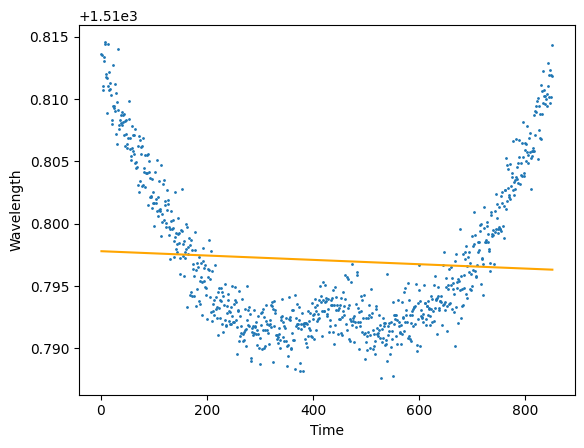

In [741]:
plot_scatter_and_polynomial_best_fit_line(x, y, 1)

<span style="color:aqua">A linear fit is not appropriate since there are large residuals between the LOBF and the most of the true data.</span>

#### (b) An assumption of linear regression is that the response is linear in the parameters. Therefore the response can be modelled as a linear function of polynomials in the predictor variable. Fit a model for wavelength including both a linear and a quadratic term in ‘X’, and plot the resulting quadratic fit on your scatterplot (from part 1(c)).

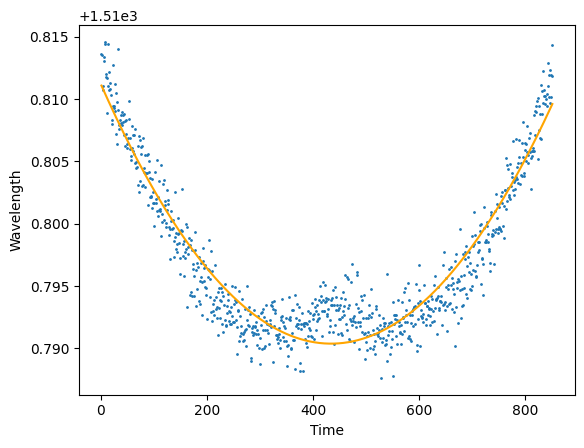

In [742]:
plot_scatter_and_polynomial_best_fit_line(x, y, 2)

#### (c) You can now proceed to fit higher order polynomials, plotting the model fit on the question 1(c) scatterplot in each case. Note that a polynomial model of order k should include all lower terms. In polynomial regression you can avoid some numerical problems if you use the standardised ‘X’ variable. Standardise ’X’ by subtracting the sample mean of ‘X’ and dividing by the sample standard deviation of ‘X’. Can you explain why it is better to use the standardised ‘X’ variable in polynomial regression models? Continue fitting higher order polynomials for as long as you judge to be reasonable (the next question should help you judge).

Text(0.5, 1.0, 'Data with polynomial LOBF of different degrees')

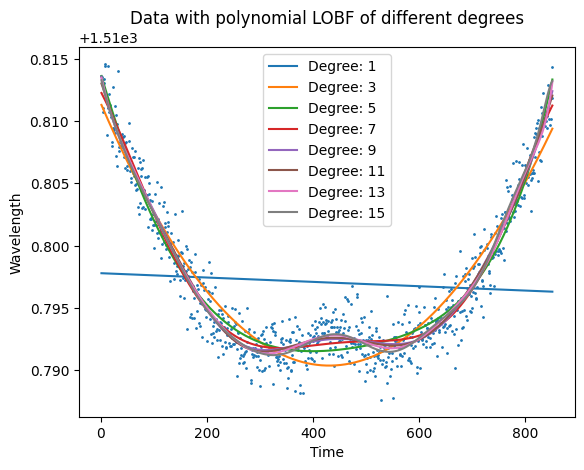

In [743]:
plt.scatter(x, y, s=1)

AIC_values = []

for i in range(1, 22):
    y_predict = fit_model_and_predict(x, y, i, AIC_values=AIC_values)
    
    if i % 2 != 0 and i < 17:
        plt.plot(x, y_predict, label=f'Degree: {i}')

plt.legend(loc="upper center")
plt.xlabel('Time')
plt.ylabel('Wavelength')
plt.title('Data with polynomial LOBF of different degrees')

#### (d) Model comparison may be made by Akaike’s Information Criterion (AIC). Briefly explain what the AIC tells you, and how it can be used to select between models. Assuming the errors are normally distributed in order to calculate the log-likelihood, produce a table of AIC for each model you have fitted. Which model do you select? Justify your answer

Text(0.5, 1.0, 'How AIC values vary with the degree of polynomial in the model')

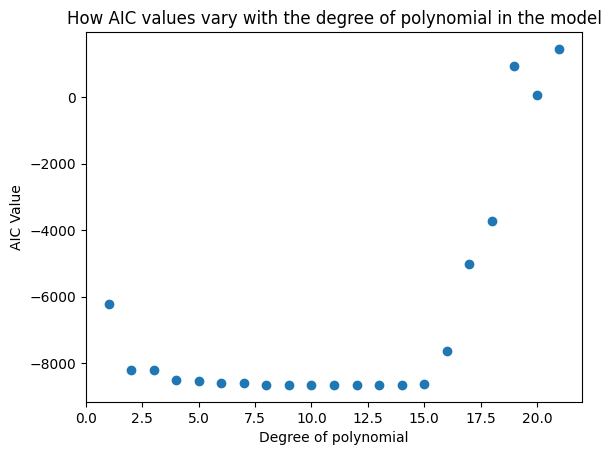

In [744]:
plt.scatter([i for i in range(1, len(AIC_values)+1)], AIC_values)
plt.xlabel('Degree of polynomial')
plt.ylabel('AIC Value')
plt.title('How AIC values vary with the degree of polynomial in the model')

In [745]:
table = [[i+1, AIC_values[i]] for i in range(len(AIC_values))]

col_names = ['Degree of Polynomial LOBF', 'AIC Value']

print(tabulate(table, headers=col_names))

  Degree of Polynomial LOBF    AIC Value
---------------------------  -----------
                          1   -6214.01
                          2   -8211.28
                          3   -8210.77
                          4   -8509.75
                          5   -8528.08
                          6   -8609.74
                          7   -8611.18
                          8   -8645.55
                          9   -8643.68
                         10   -8645.94
                         11   -8644.12
                         12   -8652.63
                         13   -8652.17
                         14   -8656.11
                         15   -8635.14
                         16   -7634.85
                         17   -5034.06
                         18   -3731.85
                         19     923.21
                         20      59.8632
                         21    1447.13


Would choose polynomial of degree 14 since it gives the lowest AIC value

#### (e) For your chosen model from question 2(c), calculate the residuals and construct plots of the residuals to check your model assumptions. State clearly which assumptions you are checking with each plot, and your conclusion 

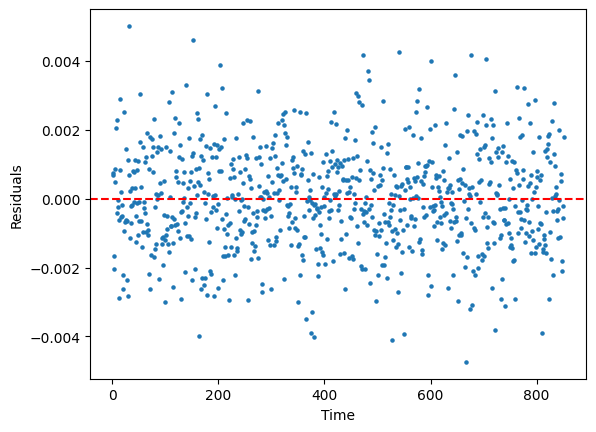

In [746]:
y_predict, model = fit_model_and_predict(x, y, CHOSEN_DEGREE, return_model=True)

plt.scatter(x, model.resid, s=5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

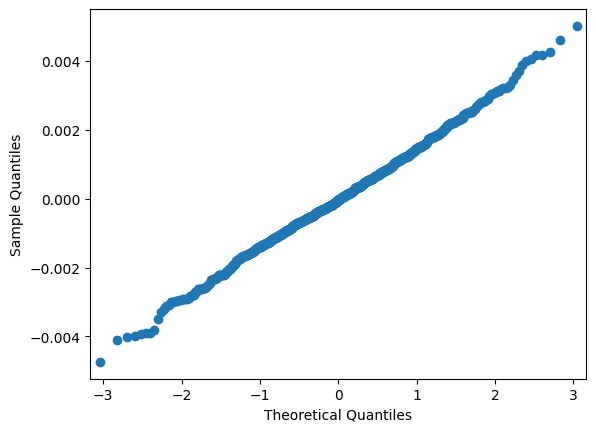

In [747]:
fig = sm.qqplot(model.resid)

#### (f) Now suppose you have only been given the responses for time indices equal to 10,20,30,...,850. Write code to extract the relevant sample from your data set, and fit the same model you chose in question 2(c) to the sample (i.e. if you chose a linear model in question 2(c), fit a linear model in the sample). Make a scatterplot including the model fit in the sample

In [748]:
x = x[9:-1:10]
y = y[9:-1:10]

In [749]:
X = get_normalized_design_matrix(x, CHOSEN_DEGREE)

In [750]:
X.shape

(85, 15)

In [751]:
matrix = [sigma * np.linalg.inv(np.matmul(np.transpose(X), X))[j,j] for j in range(15)]

In [752]:
matrix

[1.8092347157151498e-05,
 -0.40965535844074513,
 -2000.0081487854818,
 -602628.767510376,
 -45942164.171640866,
 -1214932879.2592218,
 -12569838284.101686,
 -50900241584.89002,
 -63544987889.95988,
 19652556522.330875,
 16150283178.790571,
 -77681646033.96828,
 -53418757700.7517,
 -8120085347.752985,
 -202584550.8490834]

In [753]:
def calc_corrected_error_variance(y, y_predict):
    n = len(y)
    return np.sqrt(1 / (n - 2) * np.sum([(y[i] - y_predict[i]) ** 2 for i in range(n)]))

In [754]:
sigma = calc_corrected_error_variance(y, y_predict)
print(sigma)

beta_standard_error = np.array([sigma * np.sqrt(np.linalg.inv(np.matmul(X, np.transpose(X)))[j, j]) for j in range(15)])

0.012984628292971942


C:\Users\Charlie\AppData\Local\Temp\ipykernel_20196\2120869231.py:4: RuntimeWarning: invalid value encountered in sqrt
  beta_standard_error = np.array([sigma * np.sqrt(np.linalg.inv(np.matmul(X, np.transpose(X)))[j, j]) for j in range(15)])


In [755]:
beta_standard_error

array([157397.48151885,             nan,             nan,             nan,
       308660.65171508,             nan, 982625.0601518 ,             nan,
                   nan, 752470.29417536, 453443.63822555, 149943.97250575,
                   nan, 282469.66923986, 347228.56327382])

Text(0.5, 1.0, 'Reduced data and polynomial LOBF of degree 14')

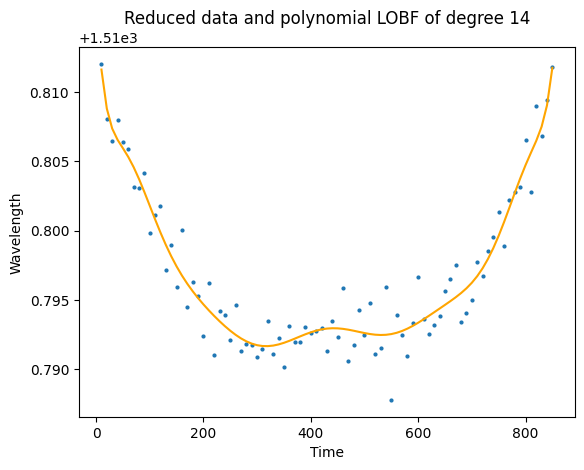

In [756]:
plt.scatter(x, y, s=4)
y_predict = fit_model_and_predict(x, y, CHOSEN_DEGREE)
plt.plot(x, y_predict, c='orange')

plt.xlabel('Time')
plt.ylabel('Wavelength')
plt.title('Reduced data and polynomial LOBF of degree 14')

# Question 3: Bootstrapping
#### (a) Using the sample from question 2(f), you are asked to calculate a 95% pointwise confidence band for the expected wavelength as a function of time index. It is pointwise as the band is constructed from a set of confidence intervals, one at each point (value of ‘X’). You decide to bootstrap.

#### Calculate the residuals.

In [757]:
residuals = [y[i] - y_predict[i] for i in range(len(y))]

### Then code the following algorithm: 
- Resample from the vector of residuals with replacement, to get a boostrapped sample. 
- Calculate a new response variable.
- Fit a polynomial regression model (same order as in question 2(f)) for the new response values y∗i – note the predictor variables are the same as in question 2(f). 
- Save the predicted values from the polynomial regression model. Repeat this many times, then calculate across all repetitions the 0.025 and 0.975 quantiles of the predicted frequencies for each value of ‘X’ – these are the upper and lower limits of the confidence intervals at each time point, which may be joined together to form a 95% confidence band. Add the bootstrapped 95% confidence band 4


Text(0.5, 1.0, 'Reduced data and 95% confidence band for polynomial LOBF of degree 14')

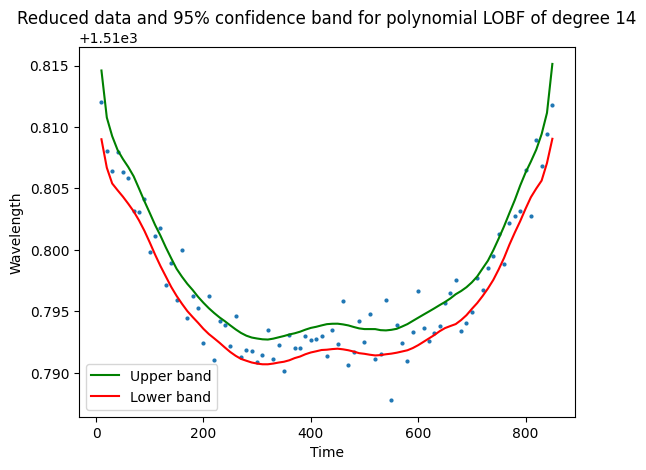

In [758]:
sigma = calc_corrected_error_variance(y, y_predict)
mu = 0
n_samples = 1000
n = len(x)

samples = []
for i in range(n_samples):
    sample_residual = np.random.choice(residuals, n, replace=True) # Resampling from vector of residuals
    # sample_residual = np.random.choice(residuals)
    y_sample = y + sample_residual # Calculating new response variable
    y_predict_from_sample = fit_model_and_predict(x, y_sample, CHOSEN_DEGREE) # Fitting regression model
    samples.append(y_predict_from_sample)

samples = np.array(samples)

lower_bound = []
upper_bound = []

for i in range(n):
    samples_at_time_step = samples[:, i]
    two_point_five_percent_quantile_value = np.quantile(samples_at_time_step, 0.025)
    ninety_seven_point_five_percent_quantile_value = np.quantile(samples_at_time_step, 0.975)
    lower_bound.append(two_point_five_percent_quantile_value)
    upper_bound.append(ninety_seven_point_five_percent_quantile_value)

plt.plot(x, upper_bound, c='green', label='Upper band')
plt.plot(x, lower_bound, c='red', label='Lower band')

plt.scatter(x, y, s=4)
plt.legend()

plt.xlabel('Time')
plt.ylabel('Wavelength')
plt.title('Reduced data and 95% confidence band for polynomial LOBF of degree 14')

#### (b) Show graphically that as the number of bootstrapped samples increases, the bootstrapped confidence band converges to the actual confidence band

- Are we supposed to plot the actual confidence band, i.e. find the upper and lower bound of each of the beta parameters and plot the predicted y values for the upper bound values and also the lower bound values?
- If so, are we supposed to use this equation derived from the normal equation:
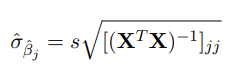

In [ ]:
https://stackoverflow.com/questions/72816601/t-distribution-formula-for-percent-point-function
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html